In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

df = pd.read_csv('banking.csv')

y = df.y
df.drop(['y'],axis=1, inplace=True)
d
x

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)
LogisticRegression()


C:\python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred = log_regression.predict(X_test)
cnf_metrix = metrics.confusion_matrix(y_test, y_pred)
cnf_metrix

array([[10654,   270],
       [  877,   556]], dtype=int64)

<AxesSubplot: >

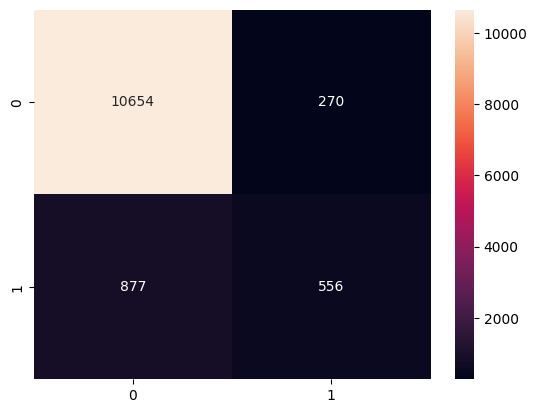

In [36]:
ax = plt.subplot()
sns.heatmap(cnf_metrix, annot=True, fmt='g', ax=ax)

In [37]:
print('Accurancy:', metrics.accuracy_score(y_test, y_pred))

Accurancy: 0.9071781176661002


In [38]:
print('Точність:', metrics.precision_score(y_test, y_pred))

Точність: 0.6731234866828087


In [39]:
print('Повнота:', metrics.recall_score(y_test, y_pred))

Повнота: 0.38799720865317516


In [40]:
print('Повнота:', metrics.f1_score(y_test, y_pred, average=None))

Повнота: [0.94892006 0.49225321]


In [41]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

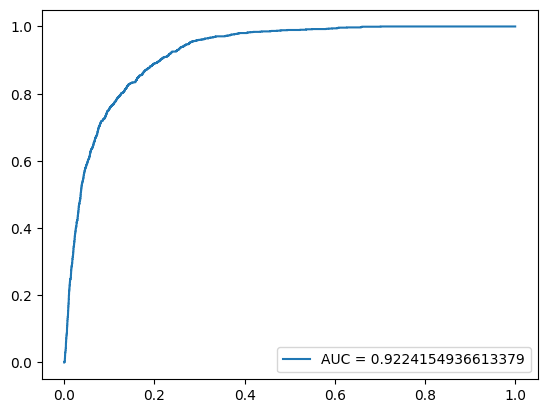

In [42]:
plt.plot(fpr,tpr, label="AUC = "+str(auc))
plt.legend(loc=4)
plt.show()

-------------------

In [21]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
X, y = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

In [36]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [37]:
class_0 = X[y == 0]
class_1 = X[y == 1]

print(len(class_0[:, 0]), len(class_1[:, 0]))

11 9


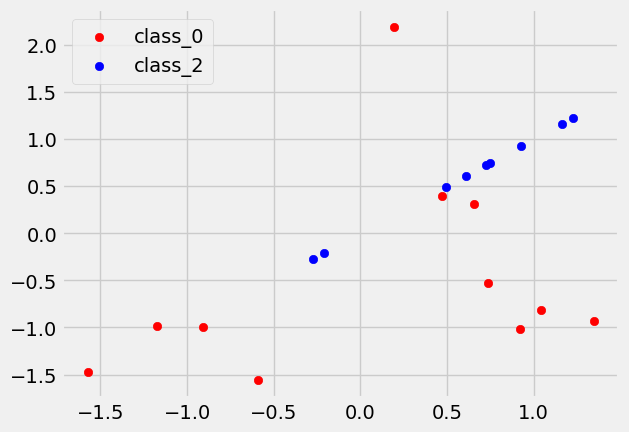

In [38]:
plt.style.use('fivethirtyeight')
plt.scatter(class_0[:, 0], class_0[:, 1], c='r', label='class_0')
plt.scatter(class_1[:, 1], class_1[:, 1], c='b', label='class_2')
plt.legend(loc='upper left')

In [39]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [44]:
y_pred = model.predict(X)

In [45]:
x = np.linspace(-3, 3)

In [81]:
model_a = model.coef_
model_b = model.intercept_

print(model_a[0])
print(model_b)

[-0.3723056   1.09390672]
[-0.23308746]


In [82]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [84]:
model_sk = model_a * X  + model_b
model_sk[:, 1]

array([-1.94319167,  0.19824047,  0.10675004,  0.43085093,  1.11045048,
       -1.34661829,  0.56073025, -0.45982419,  2.1662076 ,  0.77882427,
       -1.12487198,  0.58399091,  1.03778795, -1.24777444, -1.31326403,
        0.3081806 , -1.31974524, -1.83978142, -0.53366957, -0.81502186])

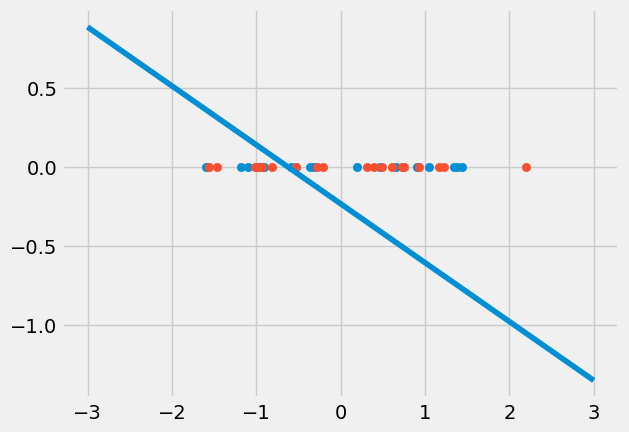

In [67]:
plt.plot(x, model_sk)
plt.scatter(X[:, 0], np.zeros(X.shape[0]))
plt.scatter(X[:, 1], np.zeros(X.shape[0]))

In [7]:
df = pd.DataFrame({'X_0': X[:, 0], 'X_1': X[:, 1], 'y':y, 'y_pred': y_pred})

df['right'] = df['y_pred'] == df['y']

df.head()

,X_0,X_1,y,y_pred,right
0,-0.282806,-1.408761,0,0,True
1,0.947029,0.559068,0,1,False
2,1.157722,0.474995,0,0,True
3,1.995915,0.772821,1,0,False
4,0.040500,1.397327,1,1,True


In [ ]:
accuracy = sum(df['y'] == df['y_pred']) / X.shape[0]

print(f'Accuracy_my: {accuracy}', f'Accuracy_sk: {accuracy_score(y, y_pred)}', sep='\n')

In [9]:
wrong_class_0 = X[~(df['right']) & (df['y'] == 0)]
wrong_class_1 = X[~(df['right']) & (df['y']) == 1]

display(wrong_class_0, wrong_class_1)

array([[0.94702918, 0.55906844],
       [0.62203454, 2.36749526]])

array([[ 1.99591479,  0.77282149],
       [ 2.07569216,  0.66009587],
       [-0.87496777, -0.11350669]])

In [10]:
df[df['right'] == True].shape[0]

15

In [11]:
df[df['right'] != True].shape[0]

5

In [12]:
df['right'].sum() / X.shape[0]

0.75

Text(0, 0.5, 'y')

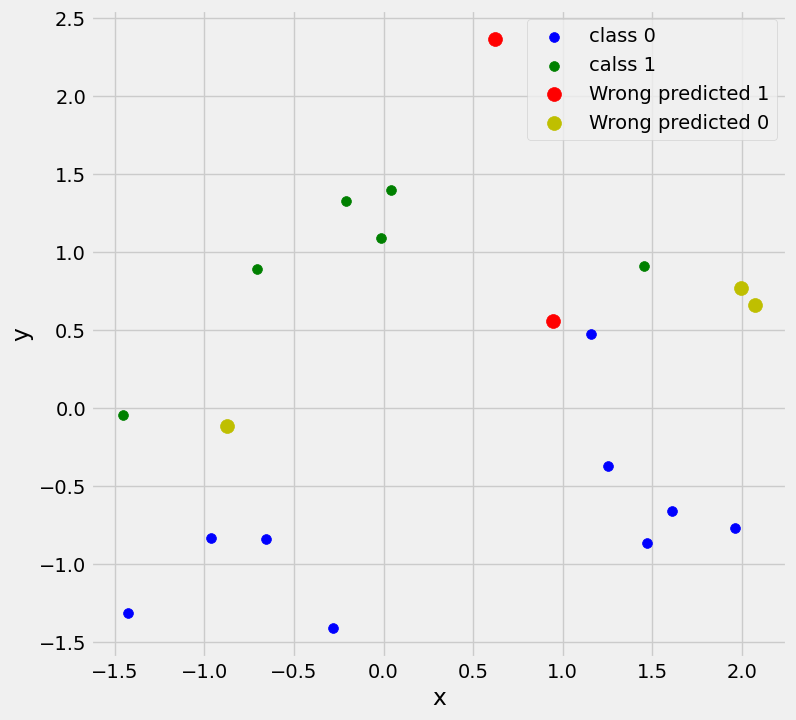

In [13]:
plt.figure(figsize=(8, 8))

plt.scatter(class_0[:, 0], class_0[:, 1], c='b', s=50, label='class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], c='g', s=50, label='calss 1')

plt.scatter(wrong_class_0[:, 0], wrong_class_0[:, 1], c='r', label='Wrong predicted 1', s=100)
plt.scatter(wrong_class_1[:, 0], wrong_class_1[:, 1], c='y', label='Wrong predicted 0', s=100)

plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')

----------

In [55]:
import warnings 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn import metrics
warnings.filterwarnings('ignore')

data = pd.read_csv('banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [2]:
y = data.y
data.drop('y', axis=1, inplace=True)

In [3]:
x = data[[colu for colu in data.columns if data[colu].dtype in ['int64','float64']]]
x.drop(['campaign','previous'], axis=1, inplace=True)

In [4]:
class_0 = x[y == 0]
class_1 = x[y == 1]

In [5]:
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [9]:
y_pred = model.predict(x)
y_pred[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
b_0 = model.coef_
b_n = model.intercept_

print(f'coef_:  {b_0}', f'intercept: {b_n}', sep='\n')

coef_:  [[ 0.00076143  0.00468754 -0.00155156 -0.22793422  0.31038515  0.04985981
  -0.24930772 -0.00558586]]
intercept: [0.00313397]


In [11]:
proba = model.predict_proba(x)
proba[:10]

array([[0.98345807, 0.01654193],
       [0.98251137, 0.01748863],
       [0.24297792, 0.75702208],
       [0.92636582, 0.07363418],
       [0.54384348, 0.45615652],
       [0.9929168 , 0.0070832 ],
       [0.91959002, 0.08040998],
       [0.9236295 , 0.0763705 ],
       [0.58613193, 0.41386807],
       [0.92514644, 0.07485356]])

In [13]:
np.where(proba[::, 1][:10] >= 0.5, 1, 0)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

<AxesSubplot: >

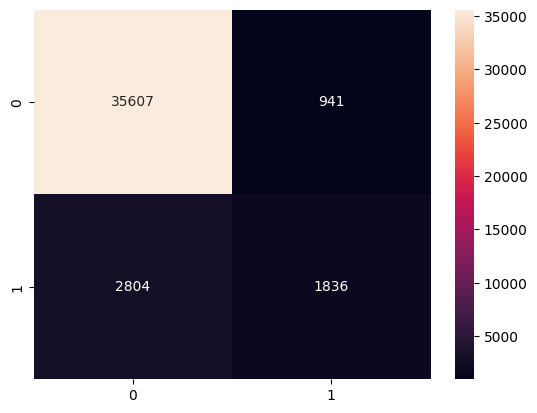

In [18]:
matrix = confusion_matrix(y, y_pred)

sns.heatmap(matrix, fmt='g', annot=True)

In [19]:
TP = matrix[1][1]
FP = matrix[0][1]
FN = matrix[1][0]
TN = matrix[0][0]

In [20]:
Accuracy = sum(y == y_pred) / x.shape[0]

print(f'Accuracy_my: {Accuracy:.2f}, Accuracy_sk: {accuracy_score(y, y_pred):.2f}', sep='\n')

Accuracy_my: 0.91, Accuracy_sk: 0.91


In [29]:
accuracy = (TN + TP) / (TP + FP + FN + TN)

print(f'accuracy: {accuracy:.2f}')

accuracy: 0.91


In [30]:
precision = TP / (TP + FP)

print(f'precisiom_my: {precision:.2f}', f'precision_sk: {precision_score(y, y_pred):.2f}')

precisiom_my: 0.66 precision_sk: 0.66


In [31]:
recal = TP / (TP + FN)

print(f'recal_my: {recal:.2f}', f'recal_sk: {recall_score(y, y_pred):.2f}')

recal_my: 0.40 recal_sk: 0.40


In [54]:
f1_my = 2 * (precision * recal) / (precision + recal)

print(f'f1_my: {f1_my:.2f}', f'f1_sk: {f1_score(y, y_pred):.2f}', sep='\n')

f1_my: 0.50
f1_sk: 0.50


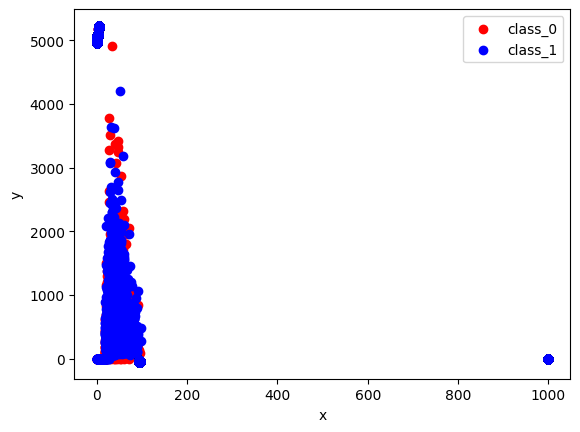

In [66]:


plt.scatter(class_0.iloc[::, 0], class_0.iloc[::, 1], c='r', label='class_0')
plt.scatter(class_0.iloc[::, 2], class_0.iloc[::, 3], c='r')
plt.scatter(class_0.iloc[::, 4], class_0.iloc[::, 5], c='r')
plt.scatter(class_0.iloc[::, 6], class_0.iloc[::, 7], c='r')

plt.scatter(class_1.iloc[::, 0], class_1.iloc[::, 1], c='b', label='class_1')
plt.scatter(class_1.iloc[::, 2], class_1.iloc[::, 3], c='b')
plt.scatter(class_1.iloc[::, 4], class_1.iloc[::, 5], c='b')
plt.scatter(class_1.iloc[::, 6], class_1.iloc[::, 7], c='b')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [63]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [58]:
metrics.fbeta_score(y, y_pred, beta=0.5)

0.5829311658623318

In [59]:
metrics.fbeta_score(y, y_pred, beta=1)

0.4950788728596467

In [60]:
metrics.fbeta_score(y, y_pred, beta=1.5)

0.451464023605962

In [62]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     36548
           1       0.66      0.40      0.50      4640

    accuracy                           0.91     41188
   macro avg       0.79      0.68      0.72     41188
weighted avg       0.90      0.91      0.90     41188



----------------

In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [71]:
x, y = make_classification(n_samples=100, n_features=2, n_classes=2,  n_redundant=0, n_informative=2, weights=[0.7, 0.3])

In [72]:
np.bincount(y)

array([69, 31], dtype=int64)

In [73]:
df = pd.DataFrame({'x_0': x[:, 0], 'x_1': x[:, 1], 'y': y})

In [74]:
df

,x_0,x_1,y
0,0.860094,-0.999006,1
1,0.357843,2.470920,1
2,-0.354060,-0.440367,0
3,-1.828280,1.443270,0
4,-0.522130,-0.882082,0
...,...,...,...
95,-1.425943,-0.985339,0
96,0.774076,-1.760250,1
97,-1.857442,0.496375,0
98,-0.797889,-0.717996,0


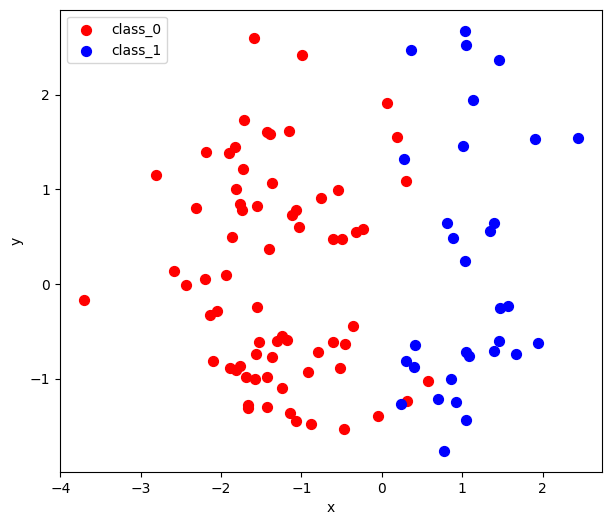

In [75]:
class_0 = x[y == 0]
class_1 = x[y == 1]


plt.figure(figsize=(7, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], c='r', s=50, label='class_0')
plt.scatter(class_1[:, 0], class_1[:, 1], c='b', s=50, label='class_1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [76]:
model_log = LogisticRegression()
model_log.fit(x, y)

LogisticRegression()

In [101]:
y_pred = model_log.predict(x)
y_pred_proba = model_log.predict_proba(x)
y_pred_proba[:, 1]

array([8.58365862e-01, 5.67867590e-01, 1.45884826e-01, 2.19321118e-03,
       9.50980389e-02, 9.71071066e-01, 4.40026441e-03, 9.84707270e-01,
       7.66738610e-03, 9.14527731e-01, 2.46119872e-02, 7.34587410e-02,
       1.62237324e-03, 4.82181456e-03, 9.11397726e-01, 7.45013424e-04,
       3.81229577e-04, 3.47803872e-03, 1.91427123e-01, 5.48318435e-03,
       7.66236075e-04, 3.00204636e-03, 5.46565772e-04, 7.86034289e-03,
       9.79575655e-01, 9.60573963e-01, 5.07318447e-03, 8.44201650e-03,
       4.90507371e-03, 3.74824840e-03, 2.28147684e-02, 4.85383206e-02,
       1.54643637e-02, 1.24263940e-02, 9.36380799e-06, 9.67010521e-01,
       2.39076378e-03, 7.20672318e-01, 1.17265656e-03, 9.72902503e-01,
       5.29848501e-01, 2.28944078e-03, 9.28268478e-01, 9.93223320e-01,
       1.75781893e-02, 8.67831264e-02, 3.61213545e-01, 3.19786884e-02,
       1.11521878e-01, 1.91128129e-03, 9.09864540e-01, 2.10579062e-02,
       6.13059273e-01, 4.97645968e-03, 1.67696956e-02, 7.88479236e-01,
      

In [83]:
print(y_pred_proba[:5][::, 1])

[0.85836586 0.56786759 0.14588483 0.00219321 0.09509804]


In [84]:
np.where(y_pred_proba[:5][::, 1] >= 0.5, 1, 0)

array([1, 1, 0, 0, 0])

In [85]:
y_pred[:5]

array([1, 1, 0, 0, 0])

In [89]:
print(f'Accuracy: {metrics.accuracy_score(y, y_pred):.2f}')
print(f'Precision: {metrics.precision_score(y, y_pred):.2f}')
print(f'Recal: {metrics.recall_score(y, y_pred):.2f}')
print(f'f1: {metrics.f1_score(y, y_pred) }')

Accuracy: 0.96
Precision: 0.91
Recal: 0.97
f1: 0.9374999999999999


In [91]:
matrix = metrics.confusion_matrix(y, y_pred)
matrix

array([[66,  3],
       [ 1, 30]], dtype=int64)

<AxesSubplot: >

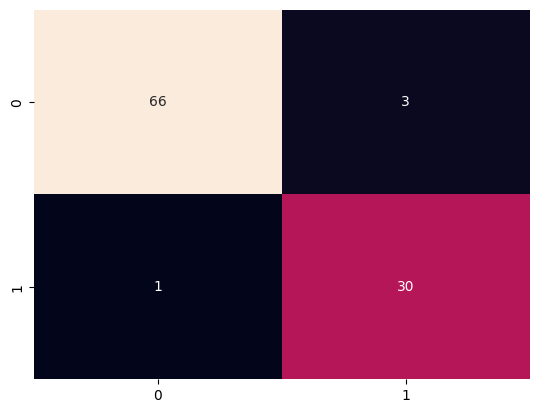

In [94]:
sns.heatmap(matrix, annot=True, fmt='g', cbar=False)

In [108]:
proba = model_log.predict_proba(x)[::, 1]

fpr, tpr, _ = metrics.roc_curve(y, proba)
auc = metrics.roc_auc_score(y, proba)

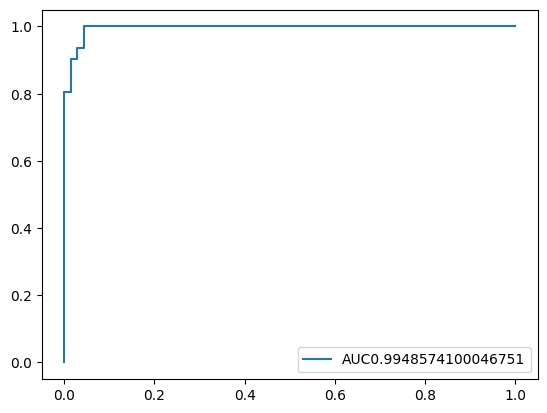

In [109]:
plt.plot(fpr, tpr, label='AUC'+str(auc))
plt.legend()

In [69]:
r = float(1e-30)

print(r)

1e-30


----------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_classification

In [2]:
date = pd.date_range('20240101', periods=25)

x = np.random.randn(2, 25)
y = np.random.randint(0, 2, 25)

In [3]:
df = pd.DataFrame({'date':date, 'x_0':x[0], 'x_1':x[1], 'y':y})

In [4]:
df.head()

,date,x_0,x_1,y
0,2024-01-01,0.388694,-0.194902,1
1,2024-01-02,0.204043,0.114681,1
2,2024-01-03,0.527734,-1.337395,0
3,2024-01-04,-1.125660,0.117913,0
4,2024-01-05,-0.327520,-0.114284,0


In [97]:
import random
from random_words import RandomWords


words = []

w = RandomWords()

for i in range(0, 25):
    words.append(w.random_word())


In [98]:
df['words'] = words

In [100]:
df.head()

,date,x_0,x_1,y,words
0,2024-01-01,0.388694,-0.194902,1,hoop
1,2024-01-02,0.204043,0.114681,1,raps
2,2024-01-03,0.527734,-1.337395,0,coils
3,2024-01-04,-1.125660,0.117913,0,leaving
4,2024-01-05,-0.327520,-0.114284,0,shouts


In [123]:
df[df["x_0"].isin(['0'])]

,date,x_0,x_1,y,words
